<a href="https://colab.research.google.com/github/Gift-eiei/CE880_Case_Study/blob/main/CE880_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Data Pre-processing

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/Data Science/Data Sci Case Study/"
file_name = "dataBiomass_CE880.xlsx"

In [4]:
df = pd.read_excel(os.path.join(path,file_name),index_col=None, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,Inputs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outputs,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Lignocellulose composition (wt%),NaN,NaN,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,Syngas composition [vol%],NaN,NaN,NaN,Lower heating value,Char yield,tar yield
2,Number,Cellulose,Hemicellulose,Lignin,[C],[bar],mass ratio,mass ratio,[m/s],H2,CO,CO2,CH4,[MJ/Nm3],mass%,g/m3
3,1,0.460025,0.28884,0.251135,665,1,0.25,0,0.22,9.69697,48.242424,35.030303,7.030303,9.646865,24,0
4,2,0.460025,0.28884,0.251135,744,1,0.3,0,0.22,10.125904,40.048219,43.477096,6.348781,8.416246,21.7,0


###Construct a new dataframe from original data

In [6]:
df = df.iloc[3:]

In [7]:
d = {'Cellulose': df[1].values,
     'Hemicellulose': df[2].values,
     'Lignin':df[3].values,
     'Temp':df[4].values,
     'Pressure':df[5].values,
     'Equivalance mass ratio':df[6].values,
     'Steam to biomass mass ratio':df[7].values,
     'Superficial gas velocity':df[8].values,
     'H2':df[9].values,
     'CO':df[10].values,
     'CO2':df[11].values,
     'CH4':df[12].values,
     'Lower heating value':df[13].values,
     'Char yield':df[14].values,
     'tar yield':df[15].values}
df = pd.DataFrame(data=d)

In [8]:
columns = df.columns

In [9]:
df.count()

Cellulose                      336
Hemicellulose                  336
Lignin                         336
Temp                           336
Pressure                       336
Equivalance mass ratio         336
Steam to biomass mass ratio    336
Superficial gas velocity       336
H2                             336
CO                             336
CO2                            336
CH4                            336
Lower heating value            336
Char yield                     336
tar yield                      336
dtype: int64

In [10]:
df.isnull().sum()

Cellulose                      0
Hemicellulose                  0
Lignin                         0
Temp                           0
Pressure                       0
Equivalance mass ratio         0
Steam to biomass mass ratio    0
Superficial gas velocity       0
H2                             0
CO                             0
CO2                            0
CH4                            0
Lower heating value            0
Char yield                     0
tar yield                      0
dtype: int64

In [11]:
df.head()

,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
0,0.460025,0.28884,0.251135,665,1,0.25,0,0.22,9.69697,48.242424,35.030303,7.030303,9.646865,24,0
1,0.460025,0.28884,0.251135,744,1,0.3,0,0.22,10.125904,40.048219,43.477096,6.348781,8.416246,21.7,0
2,0.460025,0.28884,0.251135,811,1,0.35,0,0.22,9.614294,36.159955,48.610323,5.615428,7.608063,19,0
3,0.460025,0.28884,0.251135,670,1,0.25,0,0.28,9.686536,46.993834,37.25591,6.06372,9.141723,29.6,0
4,0.460025,0.28884,0.251135,750,1,0.3,0,0.28,9.368972,39.76302,45.356848,5.51116,7.99817,27.4,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Cellulose                    336 non-null    object
 1   Hemicellulose                336 non-null    object
 2   Lignin                       336 non-null    object
 3   Temp                         336 non-null    object
 4   Pressure                     336 non-null    object
 5   Equivalance mass ratio       336 non-null    object
 6   Steam to biomass mass ratio  336 non-null    object
 7   Superficial gas velocity     336 non-null    object
 8   H2                           336 non-null    object
 9   CO                           336 non-null    object
 10  CO2                          336 non-null    object
 11  CH4                          336 non-null    object
 12  Lower heating value          336 non-null    object
 13  Char yield                   336 no

In [13]:
for col in columns:
  df[col] = df[col].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cellulose                    336 non-null    float64
 1   Hemicellulose                336 non-null    float64
 2   Lignin                       336 non-null    float64
 3   Temp                         336 non-null    float64
 4   Pressure                     336 non-null    float64
 5   Equivalance mass ratio       336 non-null    float64
 6   Steam to biomass mass ratio  336 non-null    float64
 7   Superficial gas velocity     336 non-null    float64
 8   H2                           336 non-null    float64
 9   CO                           336 non-null    float64
 10  CO2                          336 non-null    float64
 11  CH4                          336 non-null    float64
 12  Lower heating value          336 non-null    float64
 13  Char yield          

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cellulose,336.0,0.452065,0.081601,0.196078,0.435622,0.452000,0.502865,0.584000
Hemicellulose,336.0,0.280841,0.088872,0.078707,0.249327,0.289855,0.327000,0.627451
Lignin,336.0,0.267094,0.086694,0.102000,0.203039,0.251135,0.298283,0.489926
Temp,336.0,752.547515,85.306413,600.000000,657.500000,780.000000,815.000000,900.000000
Pressure,336.0,1.246518,0.949579,1.000000,1.000000,1.000000,1.000000,10.000000
Equivalance mass ratio,336.0,0.181179,0.166832,0.000000,0.000000,0.230000,0.300000,0.864198
Steam to biomass mass ratio,336.0,0.578095,1.134802,0.000000,0.000000,0.330000,0.700000,8.028674
Superficial gas velocity,336.0,0.747241,1.221697,0.021893,0.189035,0.555000,0.714364,9.589655
H2,336.0,25.997105,10.132968,5.388034,20.645197,26.404713,31.066629,66.033993
CO,336.0,31.618541,6.825742,5.012658,27.625389,32.577731,35.928018,55.440000


###Verify Distribution of Input and Output variables

array([[<Axes: title={'center': 'Cellulose'}>,
        <Axes: title={'center': 'Hemicellulose'}>,
        <Axes: title={'center': 'Lignin'}>,
        <Axes: title={'center': 'Temp'}>],
       [<Axes: title={'center': 'Pressure'}>,
        <Axes: title={'center': 'Equivalance mass ratio'}>,
        <Axes: title={'center': 'Steam to biomass mass ratio'}>,
        <Axes: title={'center': 'Superficial gas velocity'}>],
       [<Axes: title={'center': 'H2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'CO2'}>, <Axes: title={'center': 'CH4'}>],
       [<Axes: title={'center': 'Lower heating value'}>,
        <Axes: title={'center': 'Char yield'}>,
        <Axes: title={'center': 'tar yield'}>, <Axes: >]], dtype=object)

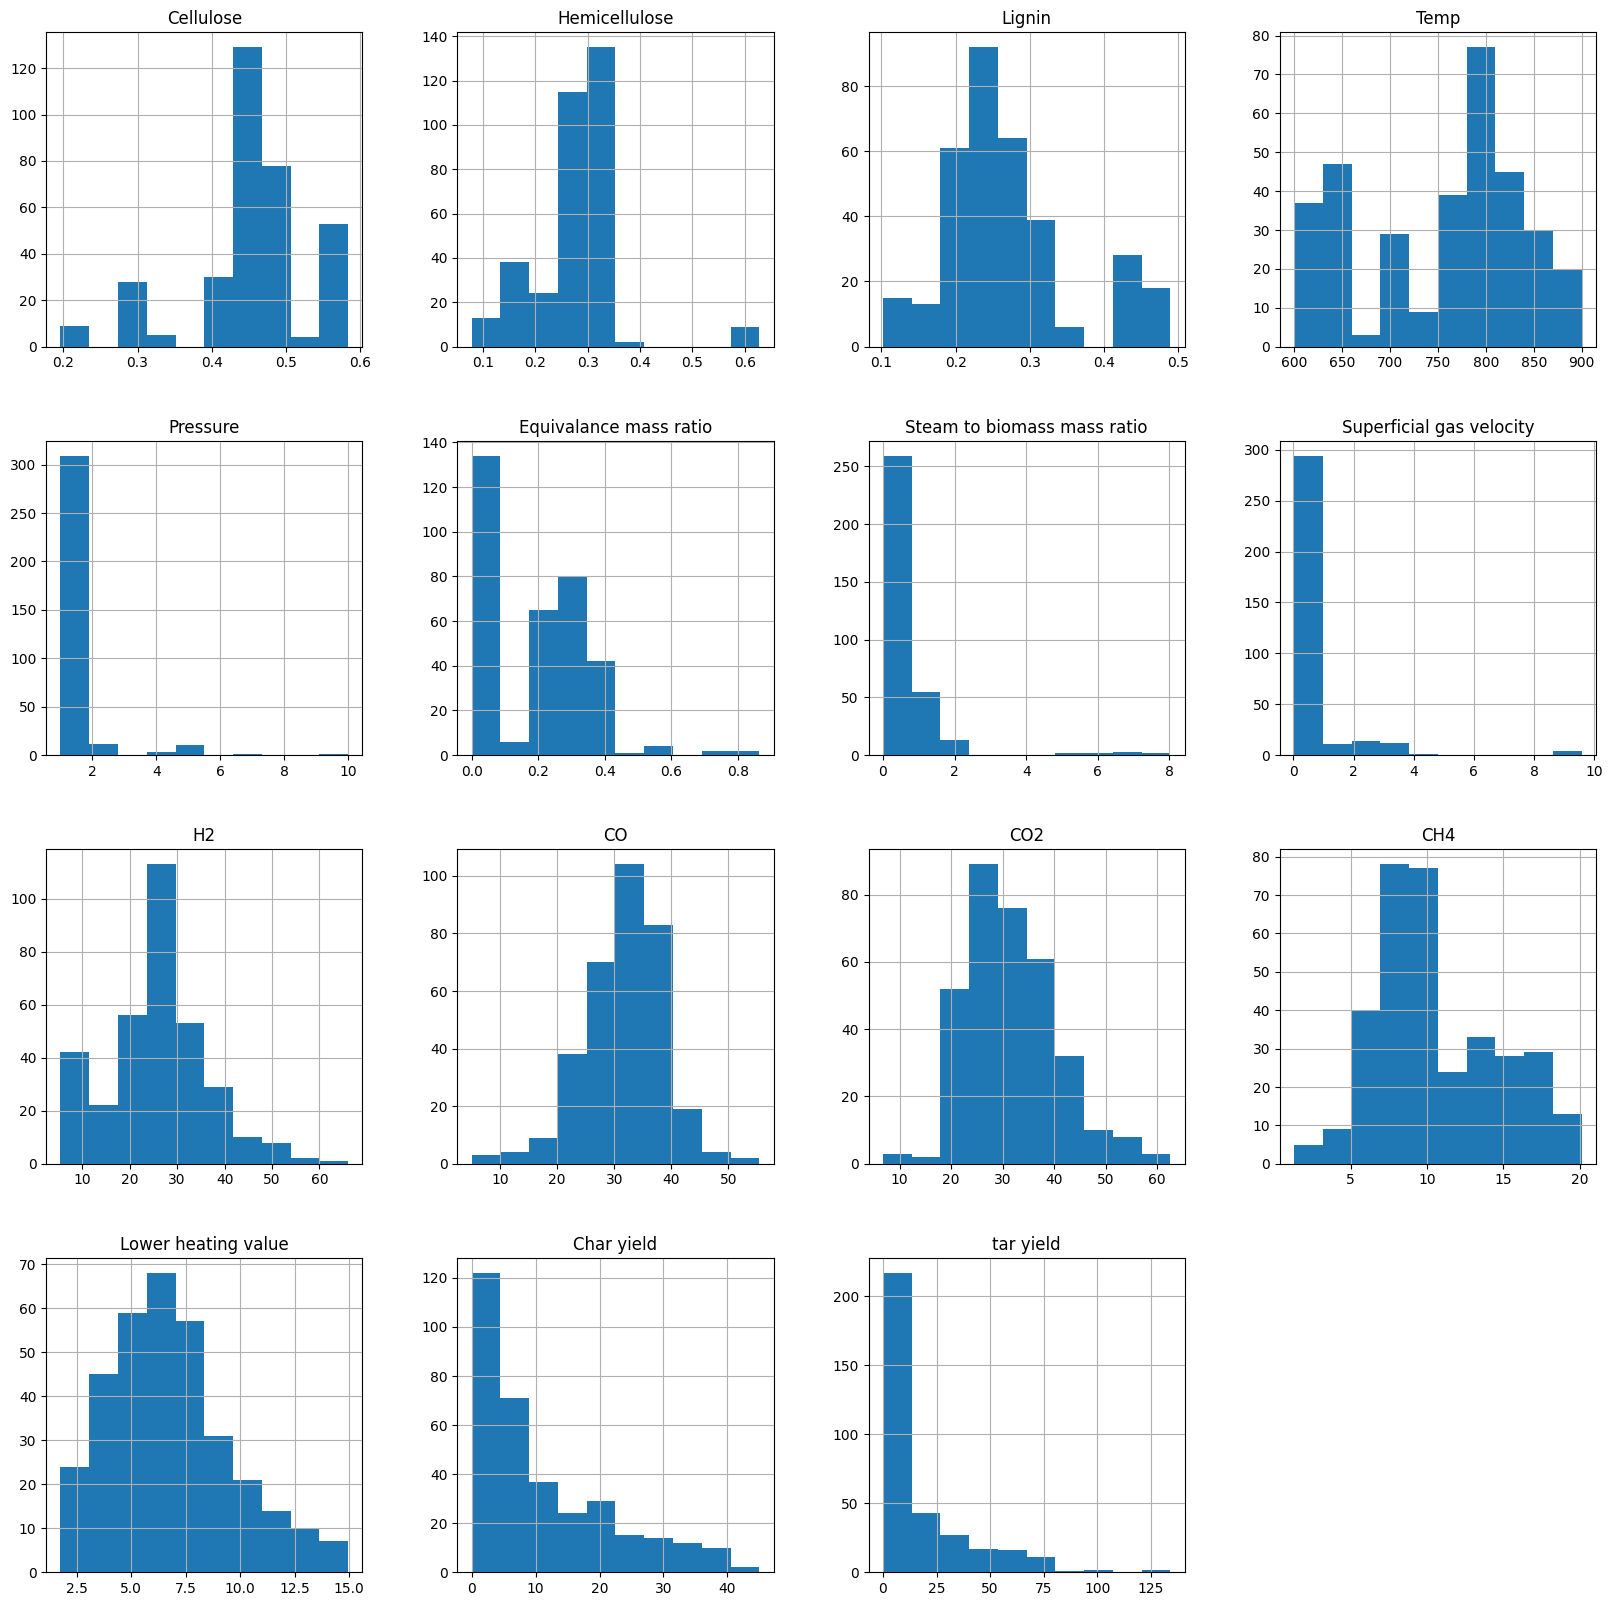

In [16]:
df.hist(figsize = (20,20))

###Validate correlation between two variables by using Correlation matrix

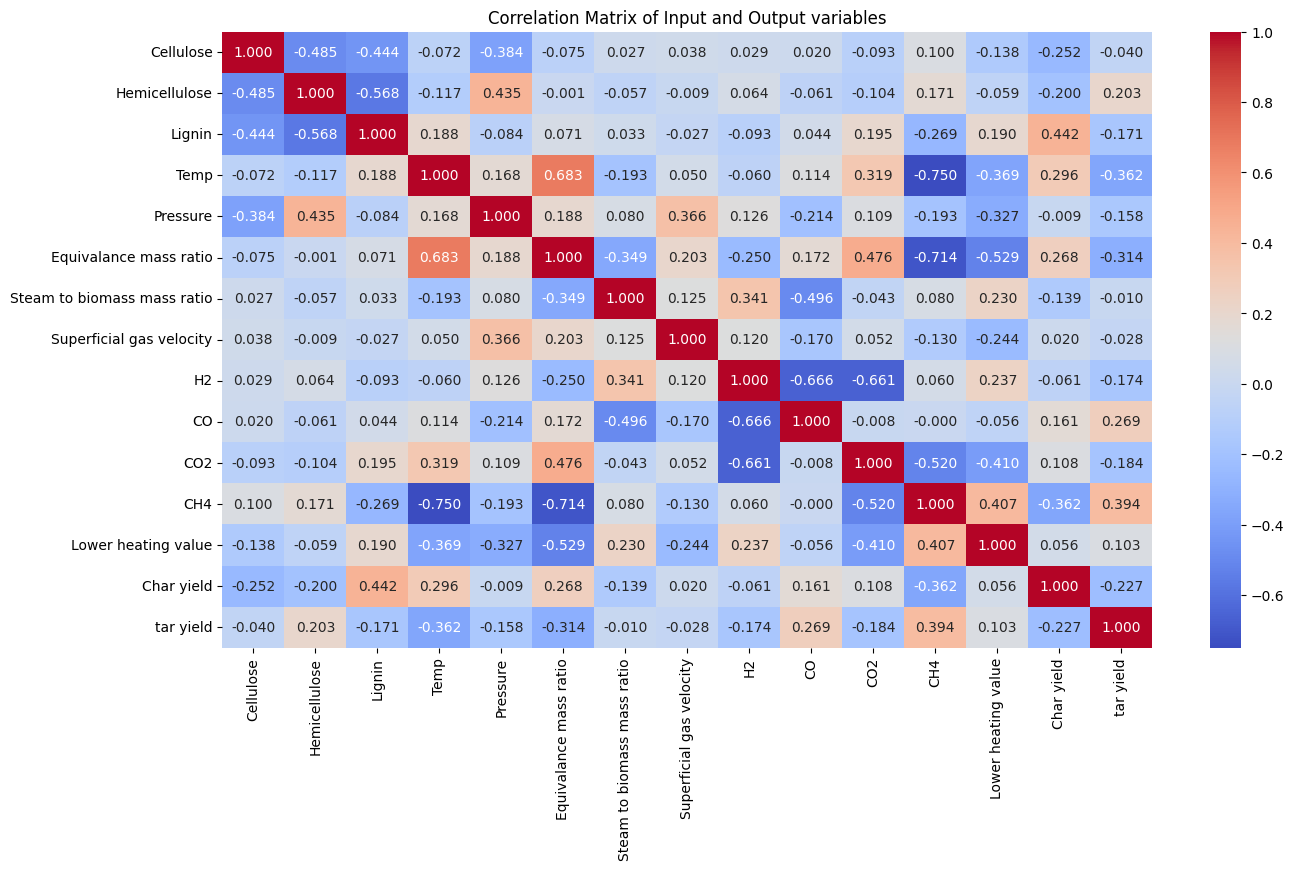

<Figure size 640x480 with 0 Axes>

In [41]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix of Input and Output variables')
plt.show()
plt.savefig("heatmap.png")

###Split features and labels to two different dataframes

In [18]:
feature_df = df[['Cellulose', 'Hemicellulose', 'Lignin', 'Temp', 'Pressure',
       'Equivalance mass ratio', 'Steam to biomass mass ratio',
       'Superficial gas velocity']]
feature_df.head()

,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity
0,0.460025,0.28884,0.251135,665.0,1.0,0.25,0.0,0.22
1,0.460025,0.28884,0.251135,744.0,1.0,0.30,0.0,0.22
2,0.460025,0.28884,0.251135,811.0,1.0,0.35,0.0,0.22
3,0.460025,0.28884,0.251135,670.0,1.0,0.25,0.0,0.28
4,0.460025,0.28884,0.251135,750.0,1.0,0.30,0.0,0.28


In [19]:
label_df = df[['H2', 'CO', 'CO2', 'CH4','Lower heating value', 'Char yield', 'tar yield']]
label_df.head()

,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
0,9.696970,48.242424,35.030303,7.030303,9.646865,24.0,0.0
1,10.125904,40.048219,43.477096,6.348781,8.416246,21.7,0.0
2,9.614294,36.159955,48.610323,5.615428,7.608063,19.0,0.0
3,9.686536,46.993834,37.255910,6.063720,9.141723,29.6,0.0
4,9.368972,39.763020,45.356848,5.511160,7.998170,27.4,0.0


#Split train and test set

In [20]:
X = feature_df.to_numpy()
y = label_df.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Hyperparameters tuning

create functions to calculate RMSE and R2 score from Cross validation

In [21]:
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [22]:
n_folds = 5

def r2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    r2 = np.sqrt(cross_val_score(model, X_train, y_train, scoring="r2", cv = kf))
    return r2

Create functions of each model and apply grid/random search for tuning models and evaluate models by calling the previous R2 and RMSE functions. Each model has its own parametes for tuning.

In [23]:
columns_target = label_df.columns

In [24]:
scaler = MinMaxScaler()

In [25]:
def decisiontree_regressor():

  regressor = DecisionTreeRegressor(random_state=42)

  feature_selector = RFE(regressor)

  pipe = Pipeline(steps=[('scaler', scaler), ('feature_selection', feature_selector), ('regressor', regressor)])

  param_grid = {
      'feature_selection__n_features_to_select' : [1,2,3,4,5,6,7,8],
      'regressor__max_depth': [None, 5, 10, 15],
      'regressor__min_samples_split': [2, 5, 10],
      'regressor__min_samples_leaf': [1, 2, 4]
  }

  search_dt_regressor = GridSearchCV(pipe, param_grid=param_grid, cv=4, n_jobs=-1)

  search_dt_regressor = search_dt_regressor.fit(X_train, y_train)

  score = rmse_cv(search_dt_regressor)
  score_r2 = r2_cv(search_dt_regressor)

  max_depth =  search_dt_regressor.best_params_["regressor__max_depth"]
  min_samples_split =  search_dt_regressor.best_params_["regressor__min_samples_split"]
  min_samples_leaf =  search_dt_regressor.best_params_["regressor__min_samples_leaf"]

  features =  search_dt_regressor.best_params_["feature_selection__n_features_to_select"]

  best_features_indices = search_dt_regressor.best_estimator_.named_steps['feature_selection'].get_support(indices=True)

  print(f"Best number of features : {features}")
  print(f"Features indices : {best_features_indices}")

  print(f"Best parameters: max_depth = {max_depth}, min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}")

  print("\nDecision tree rmse score: {:.3f} ({:.3f})\n".format(score.mean(), score.std()))
  print("\nDecision tree r2 score: {:.3f} ({:.3f})\n".format(score_r2.mean(), score_r2.std()))

  rmse = score.mean()
  r2 = score_r2.mean()

  return search_dt_regressor,round(rmse,3),round(r2,3)

In [26]:
def random_forest_regressor():

  regressor = RandomForestRegressor(random_state=42)

  feature_selector = RFE(regressor)

  pipe = Pipeline(steps=[('scaler', scaler),('feature_selection', feature_selector), ('regressor', regressor)])

  param_grid = {
      'feature_selection__n_features_to_select' : [1,2,3,4,5,6,7,8],
      'regressor__n_estimators': [10, 50, 100, 200],
      'regressor__max_depth': [None, 10, 20, 30],
      'regressor__min_samples_split': [2, 5, 10],
      'regressor__min_samples_leaf': [1, 2, 4]
  }

  search_rf_regressor = RandomizedSearchCV(pipe, param_distributions=param_grid, n_jobs=-1, cv=4, random_state=42)

  search_rf_regressor = search_rf_regressor.fit(X_train, y_train)

  score  = rmse_cv(search_rf_regressor)
  score_r2 = r2_cv(search_rf_regressor)

  n_estimators = search_rf_regressor.best_params_["regressor__n_estimators"]
  max_depth =  search_rf_regressor.best_params_["regressor__max_depth"]
  min_samples_split =  search_rf_regressor.best_params_["regressor__min_samples_split"]
  min_samples_leaf =  search_rf_regressor.best_params_["regressor__min_samples_leaf"]

  features =  search_rf_regressor.best_params_["feature_selection__n_features_to_select"]

  best_features_indices = search_rf_regressor.best_estimator_.named_steps['feature_selection'].get_support(indices=True)

  print(f"Best number of features : {features}")
  print(f"Features indices : {best_features_indices}")

  print(f"Best parameters: n_estimators = {n_estimators}, max_depth = {max_depth}, min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}")

  print("\nRandom Forest Regressor rmse score: {:.3f} ({:.3f})\n".format(score.mean(), score.std()))
  print("\nRandom Forest Regressor r2 score: {:.3f} ({:.3f})\n".format(score_r2.mean(), score_r2.std()))

  rmse = score.mean()
  r2 = score_r2.mean()

  return search_rf_regressor,round(rmse,3),round(r2,3)


In [27]:
def support_vector_regressor():

  regressor = MultiOutputRegressor(SVR())

  feature_selector = RFE(regressor)

  pipe = Pipeline(steps=[('scaler', scaler),('feature_selection', feature_selector), ('regressor', regressor)])

  param_grid = {
      'feature_selection__n_features_to_select' : [1,2,3,4,5,6,7,8],
      'regressor__estimator__C': [0.1, 1, 10, 100],
      'regressor__estimator__kernel': ['linear', 'rbf'],
      'regressor__estimator__gamma': ['scale', 'auto', 0.1, 1]
  }

  search_svm_regressor = GridSearchCV(pipe, param_grid=param_grid, cv=4, n_jobs=-1)

  search_svm_regressor = search_svm_regressor.fit(X_train, y_train)

  score = rmse_cv(search_svm_regressor)
  score_r2 = r2_cv(search_svm_regressor)

  C = search_svm_regressor.best_params_["regressor__estimator__C"]
  kernel =  search_svm_regressor.best_params_["regressor__estimator__kernel"]
  gamma =  search_svm_regressor.best_params_["regressor__estimator__gamma"]

  features =  search_svm_regressor.best_params_["feature_selection__n_features_to_select"]

  best_features_indices = search_svm_regressor.best_estimator_.named_steps['feature_selection'].get_support(indices=True)

  print(f"Best number of features : {features}")
  print(f"Features indices : {best_features_indices}")

  print(f"Best parameters: C = {C}, kernel = {kernel}, gamma = {gamma}")

  print("\nSVM rmse score: {:.3f} ({:.3f})\n".format(score.mean(), score.std()))
  print("\nSVM r2 score: {:.3f} ({:.3f})\n".format(score_r2.mean(), score_r2.std()))

  rmse = score.mean()
  r2 = score_r2.mean()

  return search_svm_regressor,round(rmse,3),round(r2,3)

In [28]:
def XGB_regressor():

  regressor = XGBRegressor()

  feature_selector = RFE(regressor)

  pipe = Pipeline(steps=[('scaler', scaler),('feature_selection', feature_selector),('regressor', regressor)])

  param_grid = {
      'feature_selection__n_features_to_select' : [1,2,3,4,5,6,7,8],
      'regressor__n_estimators': [50, 100, 150, 200],
      'regressor__learning_rate': [0.01, 0.1, 0.2, 0.3],
      'regressor__max_depth': [3, 4, 5, 6]
  }

  search_xgb_regressor = RandomizedSearchCV(pipe, param_distributions=param_grid, n_jobs=-1, cv=4, random_state=42)

  search_xgb_regressor = search_xgb_regressor.fit(X_train, y_train)

  score = rmse_cv(search_xgb_regressor)
  score_r2 = r2_cv(search_xgb_regressor)

  n_estimators = search_xgb_regressor.best_params_["regressor__n_estimators"]
  learning_rate =  search_xgb_regressor.best_params_["regressor__learning_rate"]
  max_depth =  search_xgb_regressor.best_params_["regressor__max_depth"]

  features =  search_xgb_regressor.best_params_["feature_selection__n_features_to_select"]

  best_features_indices = search_xgb_regressor.best_estimator_.named_steps['feature_selection'].get_support(indices=True)

  print(f"Best number of features : {features}")
  print(f"Features indices : {best_features_indices}")

  print(f"Best parameters: estimators = {n_estimators}, learning rate = {learning_rate}, max depth = {max_depth}")
  print("\nXGBoost rmse score: {:.3f} ({:.3f})\n".format(score.mean(), score.std()))
  print("\nXGBoost r2 score: {:.3f} ({:.3f})\n".format(score_r2.mean(), score_r2.std()))

  rmse = score.mean()
  r2 = score_r2.mean()

  return search_xgb_regressor,round(rmse,3),round(r2,3)

###Apply unit test for each model to verify rmse and r2 scores

Decision tree regressor

In [29]:
search_dt_regressor, rmse, r2 = decisiontree_regressor()
assert math.isclose(rmse, 7.524)
assert math.isclose(r2, 0.705)

Best number of features : 2
Features indices : [1 7]
Best parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 2

Decision tree rmse score: 7.524 (1.323)


Decision tree r2 score: 0.705 (0.090)



Random forest regressor

In [30]:
search_rf_regressor, rmse, r2 = random_forest_regressor()
assert math.isclose(rmse, 7.236)
assert math.isclose(r2, 0.780)

Best number of features : 8
Features indices : [0 1 2 3 4 5 6 7]
Best parameters: n_estimators = 200, max_depth = 30, min_samples_split = 5, min_samples_leaf = 1

Random Forest Regressor rmse score: 7.236 (1.044)


Random Forest Regressor r2 score: 0.780 (0.054)



SVM regressor

In [31]:
search_svm_regressor, rmse, r2 = support_vector_regressor()
assert math.isclose(rmse, 7.925)
assert math.isclose(r2, 0.752)

Best number of features : 8
Features indices : [0 1 2 3 4 5 6 7]
Best parameters: C = 100, kernel = rbf, gamma = scale

SVM rmse score: 7.925 (1.755)


SVM r2 score: 0.752 (0.055)



XGBoost

In [32]:
search_xgb_regressor, rmse, r2 = XGB_regressor()
assert math.isclose(rmse, 6.679)
assert math.isclose(r2, 0.794)

Best number of features : 7
Features indices : [0 1 2 3 4 5 6]
Best parameters: estimators = 200, learning rate = 0.3, max depth = 4

XGBoost rmse score: 6.679 (1.059)


XGBoost r2 score: 0.794 (0.051)



#Model training and Prediction performance

In [33]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

###train model

In [34]:
def train(model, X_train):

  scaler_x = scaler.fit(X_train)
  X_train_scaled = scaler_x.transform(X_train)
  y_train_scaled = scaler_y.fit_transform(y_train)

  model.fit(X_train_scaled,y_train_scaled)

  y_pred_scaled = model.predict(X_train_scaled)

  y_pred = scaler_y.inverse_transform(y_pred_scaled)

  train_loss = np.sqrt(mean_squared_error(y_train,y_pred))

  print("Train loss: {:.3f}\n".format(train_loss))

  return model, scaler_x, scaler_y

###predict target data

In [35]:
def predict(model, scaler_x, scaler_y, X_test):

  X_test_scaled = scaler_x.transform(X_test)

  y_pred_scaled = model.predict(X_test_scaled)

  y_pred = scaler_y.inverse_transform(y_pred_scaled)

  r2_arr = []
  rmse_arr = []

  for idx, col in enumerate(columns_target):
    r2 = r2_score(y_test[:,idx],y_pred[:,idx],force_finite=False)

    r2_arr.append(round(r2,3))

    rmse = np.sqrt(mean_squared_error(y_test[:,idx],y_pred[:,idx]))

    rmse_arr.append(round(rmse,3))

    print("\n[{}] r2 score: {:.3f}\n".format(col, r2))

    print("\n[{}] rmse score: {:.3f}\n".format(col, rmse))

  return np.array(r2_arr), np.array(rmse_arr)

###Apply unit test for each model to verify rmse and r2 scores of each output variables

In [36]:
def test_prediction(r2,rmse,r2_expected,rmse_expected):
  np.testing.assert_array_equal(r2,r2_expected)
  np.testing.assert_array_equal(rmse,rmse_expected)

Decision tree regressor

In [37]:
model,scaler_x, scaler_y = train(search_dt_regressor,X_train[:,[1,7]])
r2, rmse = predict(model,scaler_x, scaler_y,X_test[:,[1,7]])
r2_expected = np.array([0.838, 0.686, 0.646, 0.840, 0.685, 0.443, 0.242])
rmse_expected = np.array([4.389, 4.187, 5.387, 1.615, 1.502, 7.927, 17.554])
test_prediction(r2,rmse,r2_expected,rmse_expected)

Train loss: 4.255


[H2] r2 score: 0.838


[H2] rmse score: 4.389


[CO] r2 score: 0.686


[CO] rmse score: 4.187


[CO2] r2 score: 0.646


[CO2] rmse score: 5.387


[CH4] r2 score: 0.840


[CH4] rmse score: 1.615


[Lower heating value] r2 score: 0.685


[Lower heating value] rmse score: 1.502


[Char yield] r2 score: 0.443


[Char yield] rmse score: 7.927


[tar yield] r2 score: 0.242


[tar yield] rmse score: 17.554



Random forest regressor

In [38]:
model,scaler_x, scaler_y = train(search_rf_regressor,X_train)
r2, rmse = predict(model,scaler_x, scaler_y,X_test)
r2_expected = np.array([0.763, 0.675, 0.692, 0.855, 0.751, 0.690, 0.726])
rmse_expected = np.array([5.312, 4.256, 5.025, 1.541, 1.336, 5.913, 10.558])
test_prediction(r2,rmse,r2_expected,rmse_expected)

Train loss: 4.219


[H2] r2 score: 0.763


[H2] rmse score: 5.312


[CO] r2 score: 0.675


[CO] rmse score: 4.256


[CO2] r2 score: 0.692


[CO2] rmse score: 5.025


[CH4] r2 score: 0.855


[CH4] rmse score: 1.541


[Lower heating value] r2 score: 0.751


[Lower heating value] rmse score: 1.336


[Char yield] r2 score: 0.690


[Char yield] rmse score: 5.913


[tar yield] r2 score: 0.726


[tar yield] rmse score: 10.558



SVM Regressor

In [39]:
model,scaler_x, scaler_y = train(search_svm_regressor,X_train)
r2, rmse = predict(model,scaler_x, scaler_y,X_test)
r2_expected = np.array([0.699, 0.449, 0.626, 0.790, 0.662, 0.437, 0.513])
rmse_expected = np.array([5.991, 5.543, 5.540, 1.853, 1.556, 7.965, 14.068])
test_prediction(r2,rmse,r2_expected,rmse_expected)

Train loss: 5.865


[H2] r2 score: 0.699


[H2] rmse score: 5.991


[CO] r2 score: 0.449


[CO] rmse score: 5.543


[CO2] r2 score: 0.626


[CO2] rmse score: 5.540


[CH4] r2 score: 0.790


[CH4] rmse score: 1.853


[Lower heating value] r2 score: 0.662


[Lower heating value] rmse score: 1.556


[Char yield] r2 score: 0.437


[Char yield] rmse score: 7.965


[tar yield] r2 score: 0.513


[tar yield] rmse score: 14.068



XGBoost

In [40]:
model,scaler_x, scaler_y = train(search_xgb_regressor,X_train[:,[0,1,2,3,4,5,6]])
r2, rmse = predict(model,scaler_x, scaler_y,X_test[:,[0,1,2,3,4,5,6]])
r2_expected = np.array([0.877, 0.670, 0.798, 0.863, 0.892, 0.567, 0.771])
rmse_expected = np.array([3.829, 4.292, 4.068, 1.495, 0.880, 6.988, 9.645])
test_prediction(r2,rmse,r2_expected,rmse_expected)

Train loss: 2.693


[H2] r2 score: 0.877


[H2] rmse score: 3.829


[CO] r2 score: 0.670


[CO] rmse score: 4.292


[CO2] r2 score: 0.798


[CO2] rmse score: 4.068


[CH4] r2 score: 0.863


[CH4] rmse score: 1.495


[Lower heating value] r2 score: 0.892


[Lower heating value] rmse score: 0.880


[Char yield] r2 score: 0.567


[Char yield] rmse score: 6.988


[tar yield] r2 score: 0.771


[tar yield] rmse score: 9.645

